# Why should we study statistics?
Reasoning about uncertainty is a fundamental task in the work of a data scientist. Statistical analysis can help us with every step of the data science process: from designing data collection methods to gaining insights from data, and constructing models for making predictions about data. In particular statistical inference is concerned with drawing conclusions about a population from a representative sample. This can prove extremely useful in many situations and can even help us avoid working with flawed data. As a historical anecdote consider the famous example of the German Tank Problem in World World II. The Allied forced wanted to estimate the number of tanks that the Germans produced per month, by exploiting the fact that the serial numbers of the tanks were always assigned ascending numbers. Now the German tanks which fell into the hands of the Allied forced provided the necessary sample, and the rest was up to statistics! Conventional intelligence methods were claiming numbers around 1550, however, the statistical approach produced an estimate of 270. Later on, historical records revealed that the Germans were indeed producing around 270 tanks per month.

# Connections to probability
**Now the mathematical foundations behind statistics lie in probability theory, thus to study the former we must first understand the latter. We introduced the fundamentals of probability theory in the first course to give you exactly the tools that you will need to study statistics.**

If you recall from the probability subject, we learned how to compute the probabilities of certain events given the distributions of the random variables. For example, we saw that when we toss a fair coin 
n
 times the number of heads 
X
 is a random variable with distribution 
B
i
n
o
m
i
a
l
(
n
,
1
/
2
)
. We could then use the probability distribution of binomial random variable to compute the probability of events such as obtaining exactly 
k
 heads in 
n
 tosses. Now, in statistics, we are somewhat interested in the opposite problem. We want to answer questions such as: Suppose we know that 
Y
∼
B
i
n
o
m
i
a
l
(
100
,
p
)
 and we have observed several values of 
Y
. What can we then conclude about 
p
? So here we have some observed outcomes, and we want to find information about the underlying probability distributions of the random variable giving these outcomes.

**If a coincidence seems too unlikely, then it probably wasn't really a coincidence**

see The Suspicious Coin

# 03. Sampling and estimation

#### Populations and Samples
When talking about statistical analysis of data the first thing we must establish is the notion of population versus sample. The population refers to the entire set of data. The sample is a set of (one or more) observations from the data. The general setup in statistical data analysis is that we have a few observed values (a sample) and using these values we want to draw conclusions about the entire data set that these values came from (the population). This process is also called generalization.

We refer to the properties of the population as parameters and the properties of the sample as statistics. We then use statistical inference to make guesses about population parameters based on statistics we computed on the samples.

In [ ]:
from IPython.display import Image
Image(url= "https://d7whxh71cqykp.cloudfront.net/uploads/image/data/4336/population_sample.png")

The figure above shows an example of a complete population on the left (measured on two different features). The two density plots on the top and right indicate the value distribution on feature 2 and feature 1. The right side of the figure shows three examples of a randomly selected sample. While sample 01 and sample 02 randomly selected data points from the whole population, sample 03 only selected points if they had a positive value.

#### Sample selection

So far we have distinguished between a population and a sample, but we haven't specified anything about how we might get a sample. A common procedure is to select samples at random (as in the example of sample 01 and sample 02 in the figure above). It is always a good idea to ensure that **the selection of samples covers sufficiently all of the parameters that we mean to study**. For example, if we are interested in studying the efficacy of a new therapy for people that suffer from celiac disease then we must ensure that in our sample we consider patients with all levels of celiac disease from mild, medium to severe.

**Another important aspect is the sample size. Studies can often fail because the sample size is too small, preventing us from observing an effect of the desired magnitude. When determining what is a sufficient sample size we must always consider the variance of the parameter we want to study as well as the magnitude of the expected effect in relation to the standard deviation of the parameter.**

Finally, **we must think of the sample bias.** It is not sufficient to have a large sample size, since if we have a selection bias then we will never achieve a representative response (as in the example of sample 03 in the figure above). For example, when conducting a survey, it is often the case that the number of people that respond is a small percentage of the total number of people contacted. And people that usually respond to a survey are different than those who do not. This is what is known as **non-response bias.**

As discussed above we can see that sample selection is no easy matter. This is why we **often use randomization since it helps us avoid or at least minimize the problems** that can occur with sample selection. **Random sampling means that each element of the population has an equal chance of being chosen for the sample at each draw.** The type of sample we obtain in this fashion is called a ***simple random sample.*** We can perform the sampling with replacement, by putting back the observations back into the population after each draw or without replacement where once selected, observations are no longer available for future draws.

In Python, we have built-in functions that help us do random selection both with and without replacement. Let's look at some examples. We start with the usual import statements

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline

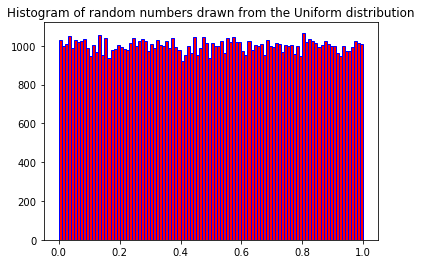

In [3]:
N = 100000
val = np.random.random(N)
plt.hist(val, 100, color='r', edgecolor='b')
plt.title("Histogram of random numbers drawn from the Uniform distribution")
plt.show()

Similarly, we can use the function random.randn() to sample from the Gaussian distribution

Text(0.5, 1.0, 'Histogram of random numbers drawn from the Gaussian distribution')

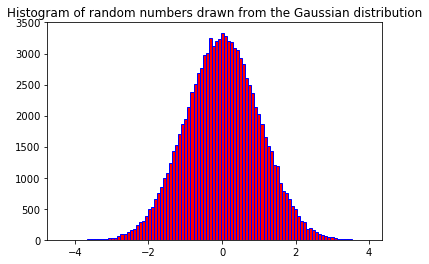

In [4]:
val2 = np.random.randn(N)
plt.hist(val2, 100, color='r', edgecolor='b')
plt.title("Histogram of random numbers drawn from the Gaussian distribution")

These two functions perform the same operation and return a continuous random sample uniformly distributed between 
0
 and 
1
. In fact, both functions use the same method in the background (the numpy.random.random_sample method). The only difference is in the way we call them whenever we want to generate a 2-dimensional matrix of random numbers.

- In numpy.random.rand, each dimension is passed separately. For example, if we want to generate a 
3
 by 
5
 matrix of random numbers uniformly distributed in 
[
0
,
1
]
, we use numpy.random.rand(3,5).

- In numpy.random.random, both dimensions should be passed as a tuple. For example, if we want to generate a 
3
 by 
5
 matrix of random numbers uniformly distributed in 
[
0
,
1
]
, we use numpy.random.random((3,5)). Note the double parenthesis here, without it the function throws an error. This difference does not show for a single dimension where the tuple is not needed here.

I hope this clarifies the difference.

#### The central limit theorem
In course one, you were introduced to the concept of the Central Limit Theorem. Roughly speaking this theorem tells us that the following: **As long as the sample size is large enough the sums (or means) of random samples resemble the normal distribution, even if the population itself is not normally distributed.**

This theorem basically underlies the whole idea behind hypothesis testing and confidence intervals (that we will cover in more depth in the next units).

Let's test this with our previous example of the random sample from the Uniform distribution. The code below plots the sums of 
k
 random variables from the uniform distribution for values of 
k
 equal to 
1
,
2
,
4
 and 
8
. We can see that the more times we iterate this process the closer we approach the normal distribution.

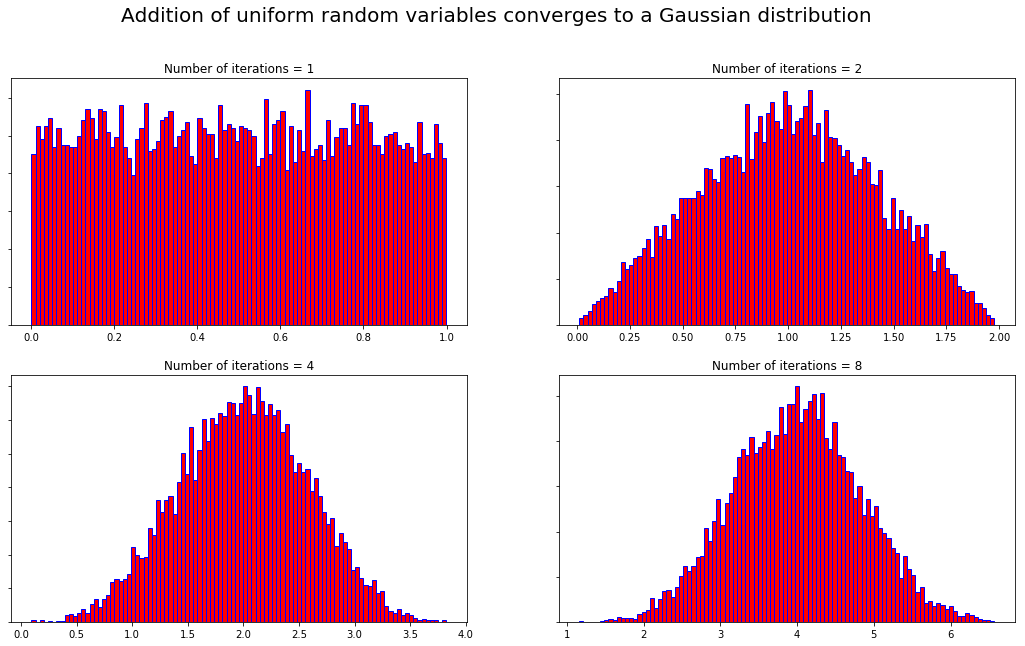

In [5]:
# define the number of random variables
N = 10000 

# define the number of iterations 
it = [1,2, 4, 8]

f = plt.figure(figsize=(18, 10))
for i in range(4):
    # define an array of zeros which will hold the sums
    x = np.zeros((N))
    subplot = f.add_subplot(2,2,i+1)
    for j in range(N):
        for k in range(it[i]):
            x[j]= x[j]+np.random.random()   
    plt.hist(x, 100, density=True, color='r', edgecolor='b')
    plt.title('Number of iterations = '+str(it[i]))
    plt.setp(subplot.get_yticklabels(), visible=False)

plt.suptitle("Addition of uniform random variables converges to a Gaussian distribution",fontsize=20);
plt.show()   

e can see that the shape of the distribution of the sums clearly approaches the normal distribution as we increase the number of iterations. In the remainder of this subject, we will assume that our population always consists of independent and identically distributed random variables and that our sample size is large enough for the central limit theorem to apply.

C:\Users\Utilisateur\anaconda3v2\envs\exts-ml\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


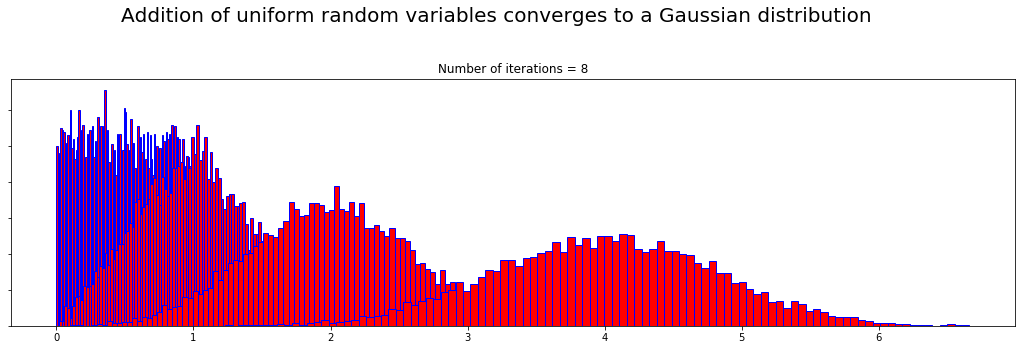

In [6]:
# define the number of random variables
N = 10000 

# define the number of iterations 
it = [1,2, 4, 8]

f = plt.figure(figsize=(18, 10))
for i in range(4):
    # define an array of zeros which will hold the sums
    x = np.zeros((N))
    subplot = f.add_subplot(2,1,1)
    for j in range(N):
        for k in range(it[i]):
            x[j]= x[j]+np.random.random()   
    plt.hist(x, 100, density=True, color='r', edgecolor='b')
    plt.title('Number of iterations = '+str(it[i]))
    plt.setp(subplot.get_yticklabels(), visible=False)

plt.suptitle("Addition of uniform random variables converges to a Gaussian distribution",fontsize=20);
plt.show()   

# Measures of center and spread

In the previous unit, we introduced the notions of population and sample. We said that a statistic was a property of the sample which is used to estimate a parameter or a property of the population. In this unit, we take a look at some of the most popular choices of statistics. Computing these statistics forms the numerical part of the exploratory data analysis concept that we introduced in the first course.

#### Measures of center

The first thing that we usually ask about a data set is its center. The center helps us quickly make an approximation about the data itself. For example, if we were interested in the amount of rainfall in Portland, Oregan we can quickly compute the average value for each month to get an idea. But what exactly is a center value? As it turns out there are several ways to define this.

What we usually refer to as the average is the arithmetic mean and is found by adding up all the values and diving by the total number of values. So if our sample consisted of the values 
x
1
,
⋯
,
x
n
 the mean is given by

¯
x
=
∑
n
i
=
1
x
i
n


In [7]:
import numpy as np

val = [78,75,82,70]
np.mean(val)


76.25

In [8]:
val2=[78,75,82,70,10]
np.mean(val2)

63.0

We can see that this new value caused the mean to drop quite a bit. This is because the mean is easily affected by outliers. Another concept of the center which is less affected by outliers is the median. The median is obtained by sorting the data set and then taking the value which is in the middle. **If the data set has an odd number of entries that this will be a unique value. If the dataset has an even number of entries then there will be two values in the middle and the median is defined as their average in this case.** Let's try this out with our previous lists

In [9]:
np.median(val)

76.5

In [10]:
np.median(val2)

75.0

#### Measures of variation
After determining the center of a data set the second most common question is to look at the spread of the data. In particular, how far away can the points be from the center? For this let's introduce a list with more values

In [11]:
val3=[94, 66, 51,  8, 10, 34, 69, 21, 49, 16, 21, 83, 44, 69, 29,  7, 26,
       77, 90, 53, 58, 84, 45, 14, 41,  7, 47, 86, 24, 48, 71, 71, 34, 86,
       52, 17,  8, 84, 41, 70, 61, 85,  6, 14, 58, 12, 99, 81, 16, 93]

In [12]:
np.max(val3) - np.min(val3)


93

A more commonly used measure of spread is the standard deviation. For a random sample 
x
1
,
⋯
,
x
n
 with mean 
¯
x
 the standard deviation is given by

The quantity under the square root is called the variance. Both the variance and the standard deviation are a measure of how far away the data points are from the mean. We can compute them easily in Python using the following functions from NumPy

In [13]:
np.mean(val3)

48.6

In [14]:
np.var(val3)

828.8400000000001

In [15]:
np.std(val3)

28.78958144885056

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

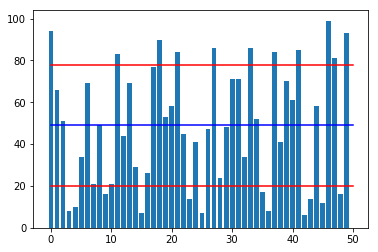

In [17]:
x_pos = range(50)
plt.bar(x_pos, val3)
plt.plot((0,50),(49,49),'b')
plt.plot((0,50),(49+29,49+29),'r')
plt.plot((0,50),(49-29,49-29),'r')
plt.show()

We can see how indeed most of the data lies between the two red lines.

We can also think of the standard deviation in terms of error prediction. Suppose we wanted to predict a value for the random variable 
X
 and we chose some value 
c
. Then the error would be 
X
−
c
. Now, the error could be either positive or negative, so it is more useful to look at the squared error 
(
X
−
c
)
2
.

Why is that? Imagine that you have an error of -10, and an error of 10. If you just took the average, your error would be 0! In order to prevent this kind of problems, the values are squared, as this makes sure that negative errors will not cancel positive errors. (This is not the only reason why errors are often squared, but it is nevertheless an important side effect.)

Now, we would like to pick the value 
c
 which would minimize this error. Performing some algebraic computations will reveal that this error is minimized when 
c
=
E
(
X
)
, which matches our intuition that 
E
(
X
)
 is a good predictor for the value of 
X
. That is, 
E
(
X
)
 achieves the smallest mean squared error. And when we plug in 
c
=
E
(
X
)
, we obtain that the mean squared error is exactly 
σ
2
X
. Therefore, the standard deviation is the smallest root mean squared error possible and it is achieved when predicting 
E
(
X
)
 for 
X
.


#### Standard error
Given a sample of size 
n
 and using the standard deviation 
s
 of the sample values, the standard error is defined as

S
E
=
s
√
n
−
1
By taking a glance at this formula the first thing we should notice is that as the sample size 
n
 increases the standard error decreases. This relationship is often referred to as the square-root of 
n
 rule. For example, it implies that to decrease the standard error by a factor of 2 we must increase the sample size by a factor of 4.

In Python, we can compute the standard error of a data set using the stats.sem() function

In [18]:
stats.sem(val3)

4.112797349835794

This means that if we took multiple samples from this population then we would expect the standard deviation of the means of these samples to be around 4.11.


#### Other measures: the z-score
The 
z
-score is an essential value in statistics, and you might have heard of it already. Essentially it tells us how far away a specific data value is from the mean. For a data value 
x
, the 
z
-score is given by
z
=
x
−
¯
x/
s
where 
s
 is the standard deviation and 
¯
x
 is the mean. The 
z
-score helps us normalize data and put it in context in terms of its mean. Let's compute the 
z
-scores for our previous example

In [19]:
mean= np.mean(val3)
std = np.std(val3)
zscores=[]
for val in val3:
    z = (val-mean)/std
    zscores.append(z)

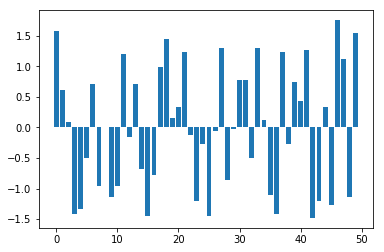

In [20]:
plt.bar(x_pos,zscores)
plt.show()

**We say that the data set is now standardized because it has a mean of 
0
 and a standard deviation of 
1**
. This can be a very useful property when we want to talk about the scales of different datasets. You will see later in the program that in machine learning it is extremely common to standardize data sets and there are prebuilt standardization packages that do all the work for us.

Hi
There exist two definitions of standard deviation:

(Population) Standard deviation (aka uncorrected standard deviation):
s
=
σ
D
=
√
∑
(
x
i
−
¯
x
)/
n

Note, we used 
s
 in the unit, and I used 
σ
D
 in my first reply above. This is typically used for populations and datasets to calculate the exact standard deviation for that data set. This is the version most familiar to people from basic probability and stats at school and implemented by numpy.std() (documentation), as used in this unit, or statistics.pstdev() (documentation).

Sample standard deviation (aka corrected standard deviation):
σ
s
a
m
p
l
e
=
√
∑
(
x
i
−
¯
x
)/
(n
−
1)

Very often we don't have access to the full population and we are only working with a sample. In that case we would like to give an estimate the true population standard deviation. Thus we use 
σ
s
a
m
p
l
e
 with 
n
−
1
 in the denominator instead of 
n
. This is the version used in statistics courses and textbooks and also implemented by pandas.std() (documentation) and statistics.stdev() (documentation).

# Covariance and correlation

When dealing with data, especially when it comes to random sampling, there are two popular measures of association that we need to be familiar with: covariance and correlation. In the previous unit, you learned about mean, variance and standard deviation. In this unit, we discuss one of the most popular and also most misunderstood topics in statistical analysis: correlation.

Correlation is about a mutual relationship between two data sets. Before we can introduce correlation we must first talk about another concept.

Covariance is a measure of how much two random variables change together. Let 
X
 and 
Y
 be two random variables. Then the covariance of 
X
 and 
Y
 is the expected value of the product of the deviations of 
X
 and 
Y
 from their respective mean
 
 Cov(X,Y) = \sigma_{XY} = E[ (X - E[X] ) (Y-E[Y] ) ] = E[XY]- E[X]E[Y]

Let's decompose the first part of the formula. We start by first centering each random variable by subtracting its mean. We then multiply the centered scores and take the expected value of the product. Notice that covariance can be either positive, negative or zero. If we replace 
Y
 by 
X
 then we get the formula for the variance of 
X
.

For the second part of the formula is derived by combining the linearity of expected values with the fact that an expected values is a constant, so that 
E
[
E
[
X
]
]
=
E
[
X
]
 and 
E
[
X
E
[
Y
]
]
=
E
[
X
]
E
[
Y
]
. Recall from our subject on Probability that whenever two random variables 
X
 and 
Y
 are independent, the expected value of their product is the product of their expected values. Hence, the covariance of independent variables is zero. Intuitively this makes sense since two independent random variables do not depend at all on each other so they should have zero covariance. **However, as we will show at the end, the converse is not true. Zero correlation does not imply independence.**
 
Now when the covariance is negative it means that as one value goes up the other goes down. On the other hand, when the covariance is positive it means that an increase in one value causes an increase in the other value. Now magnitude of the covariance indicates exactly how much a change in one value causes a change in the second. When the relationship between two variables is strong, meaning they are very dependent we expect a high magnitude of the covariance.

But there is a problem interpreting this measure. The problem with covariance is that it keeps the scale of the variables can, therefore, take on any values. This makes comparing covariances a difficult task. For example if we know that 
C
o
v
(
X
,
Y
)
=
2
 and 
C
o
v
(
Y
,
Z
)
=
8
 we can conclude that both pairs of random variables are positively correlated but we cannot say if the relationship between 
X
 and 
Y
 is stronger than the relationship between 
Y
 and 
Z
.

This is exactly where correlation comes in. It gives us a standardized measure of dependence, meaning that if there is a perfect linear relationship then we will always have a correlation coefficient of 
1
 or 
−
1
.

Then the correlation of 
X
 and 
Y
 is defined as

C
o
r
r
(
X
,
Y
)
=
C
o
v
(
X
,
Y
)
σ
X
σ
Y
It follows directly that two independent variables will always have a correlation of zero. On the other hand, a correlation of 
1
 means a perfect linear relationship, where increasing 
X
 also increase 
Y
 by the same factor. And a correlation of 
−
1
 is also reflecting a perfect linear relationship but where an increase in 
X
 results in a decrease in 
Y
 of the same factor.

Let's look at some examples. Suppose we sample two normally distributed random variables as follows

In [21]:
import numpy as np
import pandas as pd


X = np.random.randn(1,50)
Y = np.random.randn(1,50)

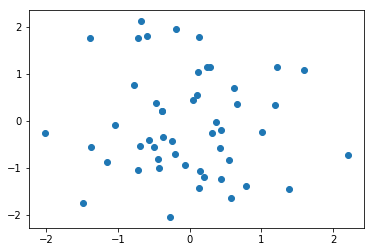

In [22]:
plt.scatter(X,Y)
plt.show()

Text(0.5, 1.0, 'Histogram of random numbers drawn from the Gaussian distribution')

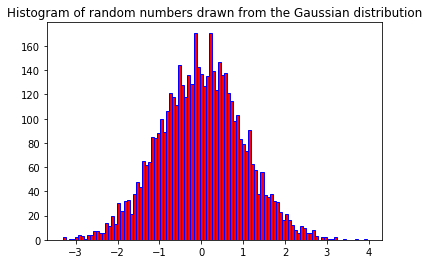

In [23]:
# retest

X1 = np.random.randn(5000)
plt.hist(X1, 100, color='r', edgecolor='b')
plt.title("Histogram of random numbers drawn from the Gaussian distribution")

Since the two sampling are completely independent we do not expect a strong relationship between the variables. The plot seems to confirm this. Let's now check the correlation. We can use NumPy's np.corrcoef() function for this.

In [24]:
np.corrcoef(X,Y)

array([[ 1.        , -0.04510123],
       [-0.04510123,  1.        ]])

What we get back is a correlation matrix whose diagonal entries are 
C
o
r
r
(
X
,
X
)
 and 
C
o
r
r
(
Y
,
Y
)
 while the off-diagonal entries are 
C
o
r
r
(
X
,
Y
)
 and 
C
o
r
r
(
Y
,
X
)
. So as we expected the correlation between 
X
 and 
Y
 is close to zero. But what if we now look at two much more closely correlated variables. **For example, what do you think the correlation between 
X
 and 
−
3
X
 would be?**
 
 -1 !

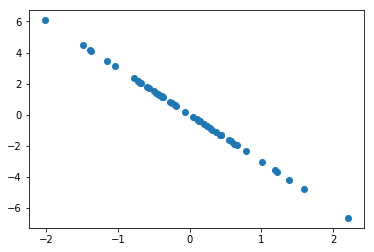

In [25]:
plt.scatter(X,-3*X)
plt.show()

In [26]:
np.corrcoef(X,-3*X)


array([[ 1., -1.],
       [-1.,  1.]])

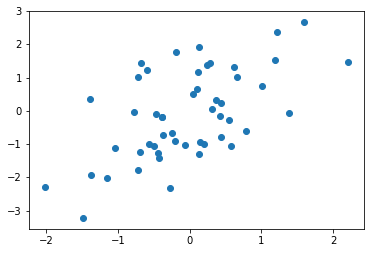

In [27]:
plt.scatter(X,X+Y)
plt.show()

In [28]:
np.corrcoef(X,X+Y)

array([[1.        , 0.58549438],
       [0.58549438, 1.        ]])

**Most of the time you will likely work with data stored in a DataFrame so you might be more interested in the pandas version of correlation so lets define a DataFrame with normally distributed values**

In [29]:
df = pd.DataFrame(np.random.randn(50, 2), columns=list('XY'))  # ou columns=('X','Y') 
df.head()

,X,Y
0,-1.816076,-0.495067
1,-0.051739,-0.069811
2,-1.132575,-0.559216
3,0.056791,-1.405682
4,1.363702,-1.061367


In [30]:
df['X'].corr(df['Y'])

0.16254442289905807

An important thing to realize when talking about correlation is that two random variables can have a correlation of zero but still be dependent. This is because **correlation only captures linear relationships, but variables can be related in non-linear ways as well.**

In [31]:
t=np.arange(0, 20, 0.2)
X=np.cos(t)
Y=np.sin(t)

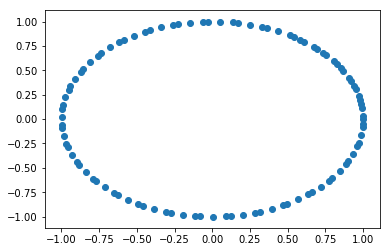

In [32]:
plt.scatter(X,Y)
plt.show()

In [33]:
np.corrcoef(X,Y)

array([[1.        , 0.03508976],
       [0.03508976, 1.        ]])

we can see that they have a correlation of almost zero. This is because they are dependent in a non-linear way, and this is not captured by the correlation coefficient.

Remarque : 
    
- Standard deviation: 
σ
D
 is the standard deviation of D.
- Variance: 
σ
2
D
 is the variance of D.
- Covariance: 
σ
X
Y
 is the covariance of X and Y.


**OTHER QUESTION :** X is a random variable that is drawn at random from a population of possible outcomes. This randomness is quantified in terms of a probability distribution associated with X. The population (plus some measure to quantify randomness or probabilities) and the random variable X are essentially equivalent.

Just to make sure that we do not confuse statistics and parameters:
A statistic is a quantity calculated from the population or a sample, e.g. the mean, median or variance.
Yes, the sample mean 
¯
x
 is a statistic of a sample 
x
=
(
x
1
,
…
,
x
n
)
 taken from our population. We can calculate it explicitly for a chosen sample, but its value varies from sample to sample.
μ
 or 
E
[
X
]
 denote the true population mean. It is a fixed value but it may be unknown to us as we may not know the underlying population explicitly.

We may model the population, respectively the random variable X, to have a specific probability distribution, with some associated parameters.
The normal distribution 
N
(
μ
,
σ
)
 is a special example as the parameters 
μ
,
σ
 give rise to two statistics, namely, the population mean and the standard deviation. Hence, we use the same notation in this case.
For the binomial distribution 
B
i
n
(
n
,
p
)
 the parameters 
n
,
p
 are not statistics, but they can be used to calculate common statistics, e.g. 
μ
=
n
p
.

# Point estimates and confidence intervals

#### Point estimates
In the previous units, we introduced the concepts of a population and a sample and we explained how statistical analysis can help us estimate a property of a population by observing the same property in the sample. For example, we might have a random sample 
X
1
,
⋯
,
X
n
 of size 
n
 and we might calculate the mean of this sample

^
μ
=
∑
n
i
=
1
X
i
n
Then 
^
μ
 is what we call a point estimate since it estimates the true mean 
μ
 of the population. Usually 
^
μ
 will not be exactly the same as 
μ
.

Let's give this a try with Python. We will need the following imports


In [34]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [35]:
poisson1 = stats.poisson.rvs(mu=55, size=200000)
poisson2 = stats.poisson.rvs(mu=10, size=100000)
population = np.concatenate((poisson1, poisson2))

In [36]:
population.mean()

40.006926666666665

In [37]:
sample= np.random.choice(population, size=1000)  

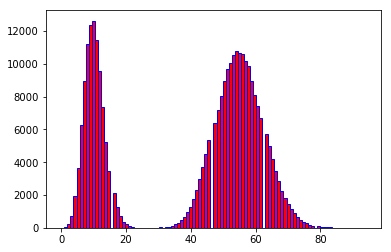

In [38]:
plt.hist(population, 100, color='r', edgecolor='b');

In [39]:
sample= np.random.choice(population, size=1000)  

In [40]:
sample_mean = sample.mean()
sample_mean

40.066

Of course, you might get a different value when you run this code because each time a new random sample is selected. But you will see that the mean of the sample tends to be within a small distance from the mean of the population. Hence, in this example, we can get a fairly good estimate of the mean by sampling only a small percentage of the population.

Let's try another example. This time we start with some population of categorical data

In [41]:
data = (['red']*50000) + (['blue']*30000) + (['green']*10000) + (['white']*10000) 

In [42]:
sample = random.sample(data, 100)  

for color in set(sample):
    print( color + " proportion estimate:" )
    print( sample.count(color)/100 )

red proportion estimate:
0.55
blue proportion estimate:
0.25
white proportion estimate:
0.11
green proportion estimate:
0.09


As you can see the distribution of the sample is very close to the true distribution in the population, despite the size of the sample being much smaller than the actual population.

#### Confidence intervals

After we make a point estimate how do we know how much confidence we can have about it? This is where the topic of confidence intervals comes in. Ideally, we would like our estimate to have a small variance for a large sample size since this would imply that it will be accurate with large probability. In reality, single point estimates are very much prone to error. To deal with this we calculate a confidence interval by providing a margin of error around our point estimate.

A higher confidence level corresponds to a wider interval since the larger our interval the more sure we can be that the population parameter will indeed fall within our margins of error. The way to think about the confidence level is as the probability that our interval contains the parameter. So if we speak of a confidence level of 95% it means that with a probability of 0.95 the calculated interval contains the population parameter.

A common practice for the margin of error is based on the standard deviation 
σ
 of the population and a parameter known as the z-critical value. Given a value of 
z
 we define the margin of error as

margin_of_error
=
z
∗
σ/
√
n


The z-critical value represents the number of standard deviations that we would have to go from the mean of the normal distribution in order to capture the proportion of the points corresponding to our chosen confidence level.

But how do we know what z-critical value we need for our confidence level? For this we can use the function stats.norm.ppf(). If we want a confidence level of 0.95 then we compute the corresponding z-critical value as:

In [43]:
z = stats.norm.ppf(q = 0.975)
z

1.959963984540054

Let's look at our previous example of Poisson random variables. Recall that we created a variable sample of 1000 values from our population and we computed a point estimate for the mean of the population based on the mean of the sample. Let's now compute the standard deviation of our population in order to set up our confidence intervals.

In [44]:
pop_std = population.std()
pop_std

22.12659407488243

In [45]:
margin_of_error = z * (pop_std / np.sqrt(1000))
margin_of_error

1.3713953089431676

In [46]:
confidence_interval = (sample_mean - margin_of_error,  sample_mean + margin_of_error) 
confidence_interval

(38.69460469105684, 41.43739530894317)

In [47]:
population.mean()

40.006926666666665

To get a better idea of this we can take several samples and plot the 95% confidence intervals for each one. Let's say we compute 10 samples. We just repeat the previous steps in a for loop and store the corresponding values.

In [48]:
intervals = []
sample_means = []

for sample in range(10):
    sample = np.random.choice(population, size = 1000)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    pop_std = population.std()  
    margin_of_error = z * (pop_std/np.sqrt(1000))
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)  
    intervals.append(confidence_interval)

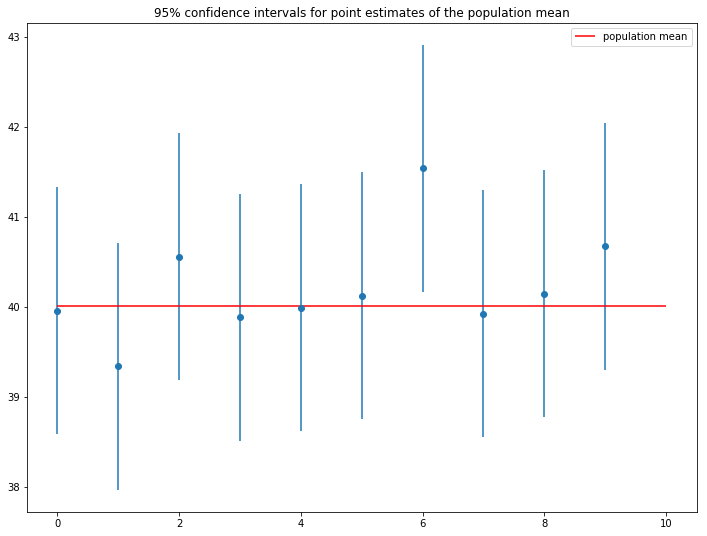

In [49]:
plt.figure(figsize=(12,9))

plt.errorbar(x=np.arange(0, 10, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=10, y=population.mean(),color="red", label='population mean')
plt.legend()
plt.title('95% confidence intervals for point estimates of the population mean')
plt.show()

**Now, this method for computing confidence intervals relies on actually knowing the standard deviation of the population. But what if this value is not available for us?** In this case, we must use yet another point estimate by computing the standard deviation of the sample.

Let 
^
σ
 be the standard deviation of your sample and 
n
 the size of your sample. Then the estimate for 
σ
 is given by
 
 σ=^σ/√n

 
 Of course, if we compute now our confidence interval with this estimate of 
σ
 instead of the true value of 
σ
 we are introducing yet another source of potential error. In order to account for this, we must use a different type of parameter. Instead of the z-critical value we now use the t-critical value which we can compute once again a function from the stats module.

In [50]:
sample_small = np.random.choice(population, size=10)  
sample_small_mean = sample_small.mean()
sample_small_mean

44.5

We can compute the t-critical value for a confidence interval of 95% as follows

In [51]:
t = stats.t.ppf(q = 0.975, df=9) 
t

2.2621571627409915

**The second parameter is for the degrees of freedom which has to be equal to the sample size minus 1 in this case**

In [52]:
sigma = sample_small.std() / np.sqrt(10)
margin_of_error = t * sigma
confidence_interval = (sample_small_mean - margin_of_error,  sample_small_mean + margin_of_error)  
confidence_interval

(30.517562841883862, 58.48243715811614)

We can see that this is a much larger interval around our point estimate due to the added error coming from having to estimate the standard deviation of the population. Of course our sample size, in this case, was very small. The higher our sample size in general the more the t-critical value will approach the z-critical value. For example with a sample size of size 10 as we had here we have the following difference between the two values

In [53]:
stats.t.ppf(q=0.975, df= 9) - stats.norm.ppf(0.975)  

0.3021931782009375

In [54]:
stats.t.ppf(q=0.975, df= 999) - stats.norm.ppf(0.975)  ## plus le degre de liberté est grand (donc le sample aussi) plus on s'approche de t-critical = z-critical

0.0023774765933946007

#### One last thing we would like to point out is that in these examples we have been computing the confidence intervals by hand by subtracting and adding the margin of error to our point estimate. However, we can do all this directly by using the function stats.t.interval() as follows

In [55]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 9,                     # Degrees of freedom
                 loc = sample_small_mean,   # Sample mean
                 scale = sigma)        

(30.517562841883862, 58.48243715811614)

which is the exact same interval that we have computed before.

As one final example, let's compute some confidence intervals for different levels of confidence

In [56]:
for confidence in (.5, .75, .8, .90, .95):
    confidence_interval = stats.t.interval(alpha = confidence, df= 9, loc = sample_small_mean, scale = sigma)                   
    interval = round(confidence_interval[1] - confidence_interval[0], 2)
    print(confidence, interval)

0.5 8.69
0.75 15.2
0.8 17.1
0.9 22.66
0.95 27.96


# Hypothesis testing

Hypothesis testing is a very commonly used tool in the statistical analysis of data. The general setup we described so far is that we have a population which we want to study, we then obtain a random sample of this population, and we want to know whether the statistics that we observed on our sample can be assumed to be true for the population in general. This is where hypothesis testing comes in, by helping us determine whether we can indeed make these assumptions.

In the general setting, we start with some hypothesis about the population that we want to test. We denote this as the null hypothesis. We then construct an opposing hypothesis that we denote as the alternative hypothesis. The hypothesis test will then tell us which hypothesis we can accept and which we must reject.

The whole process of hypothesis testing can be summed up via the steps below

- Formulate the null hypothesis (denoted by 
H
0
) and the alternative hypothesis (denoted by 
H
1
)
- Determine the sample size for your sample
- Choose a significance level (this is denoted by 
α
 and a common value is 0.05)
- Collect your sample
- Decide whether to accept or reject the null hypothesis

Now the last test is implemented of course depending on our choice of the hypothesis test. **Given the test, we will compute a test statistics from the sample data that will tell us whether to accept or reject our hypothesis. Now, this test statistic is usually examined together with something called the p-value which basically tells us the probability that the observed statistic occurred this way by chance. A very small**
p
-value should give us confidence that what we are observing is not happening by chance.

There are many tests available and in this unit, we will look at two of them: **t-tests** and **Chi-square tests.** We will continue working with our example from the previous unit with the variable population consisting of Poisson random variables

In [57]:
poisson1 = stats.poisson.rvs(mu=55, size=200000)
poisson2 = stats.poisson.rvs(mu=10, size=100000)
population = np.concatenate((poisson1, poisson2))

## One-sample t-tests

This test is meant to determine for us whether two numerical data sets differ significantly from one another. To demonstrate this with an example we will set up an artificial sample, called test sample that we create in such a way that it does indeed differ from the original population.

In [99]:
test_sample = np.concatenate((stats.poisson.rvs(mu=50, size=200), stats.poisson.rvs(mu=10, size=100)))


The main difference here is that **the mean of the first part is 50 instead of 55** as in the original population (also the size of the test_sample is much smaller than the size of the population). Let's now declare the null hypothesis:

**H
0
 = the dataset test_sample has the same distribution as the dataset population**

We will choose a significance level of 0.05 which we mentioned was common for this type of test. We can now compute our two parameters from this test: the t_statistic and the p_value using the special function in the stats module for one-sample t-tests appropriately called stats.ttest_1samp(). Let's give it a go

In [100]:
t_statistic, p_value = stats.ttest_1samp(test_sample, popmean=population.mean())
t_statistic

-3.1385008919263884

In [101]:
p_value

0.001867652993823341

Now, what does this mean? The t_statistic is a standardized metric that tells us how much the sample mean deviates from the null hypothesis. The p_value means that 1.5 percent of the time our data just randomly happened to appear this way. This is quite a small percentage in this case. But our decision on whether to reject or accept the hypothesis is based solely on the p_value in this case. The rule is the following

if the p-value is less than the significance value we reject the null hypothesis
if the p-value is greater than the significance value we failed to reject the null hypothesis
**In our case a p-value of 0.015… is certainly less then our significance value of 0.05 therefore we can reject our hypothesis. Of course, since we created this example we knew from the start that our test_sample had indeed a difference distribution, but the hypothesis test confirmed this for us.**

#### Type I and II errors
In the example above we have a null hypothesis that was false and our hypothesis test correctly confirmed that we should reject this hypothesis. Now in general, when we do not make the correct conclusion there are two types of ways in which we can be wrong:

- A **type I error** occurs if we reject the null hypothesis when it is actually true (this is also called a false positive).
- A **type II error** occurs if we fail to reject the null hypothesis when it is actually false (this is known as a false negative)
.
Now we can control the probability of making type I errors with the significance parameter that we mentioned before. **Setting the significance to 0.05 as we did in the example above means that the probability of rejecting a null hypothesis that is true is 0.05** . Of course, the decision as to which type of error we want to minimize comes down to the applications that we are working with. In some cases, **type I errors may be less acceptable, while in other cases, type II error could be less costly.**


## Chi-square tests

The **t-test we looked at before is great for comparing quantitative properties such as the mean**. However when we are dealing with **qualitative, or categorical data then we use a different test known as the chi-square test.** Let's set up an example of a categorical population and a test sample.

In [68]:
data =pd.DataFrame(['red']*50000 + ['blue']*30000 + ['green']*10000 + ['white']*10000) 
sample = pd.DataFrame(['red']*600 + ['blue']*300 + ['green']*70 + ['white']*60) 

We created a **test sample in this case which has a different distribution of colors than our population**. We will now test once again the null hypothesis that the sample has the same distribution as the population.

We begin by first establishing the distribution in each of the two datasets.

In [69]:
data_count = pd.crosstab(index=data[0], columns="count")
data_count

col_0,count
0,
blue,30000
green,10000
red,50000
white,10000


In [73]:
set(data[0])

{'blue', 'green', 'red', 'white'}

In [74]:
sample_count= pd.crosstab(index=sample[0], columns="count")
sample_count

col_0,count
0,
blue,300
green,70
red,600
white,60


Now we must calculate the chi-square statistic which is given by the following formula

∑
(
o
b
s
e
r
v
e
d
−
e
x
p
e
c
t
e
d
)
2
/
e
x
p
e
c
t
e
d


In [75]:
expected_count = data_count * len(sample) / len(data)
expected_count

col_0,count
0,
blue,309.0
green,103.0
red,515.0
white,103.0


In [76]:
chi_square = ((( sample_count - expected_count)**2) / expected_count).sum()
chi_square

col_0
count    42.815534
dtype: float64

So we have a chi-square statistic of 42.82. **But how can we interpret this? Well, first we choose a significance level, which once again we go with 0.05, and then compute the critical value corresponding to this confidence.**

In [78]:
stats.chi2.ppf(q = 0.95, df = 3)  # The degrees of freedom in this case, is given by the number of categories minus one.

7.814727903251179

We can now compute the p-value corresponding to our chi-square

In [80]:
p_value = 1 - stats.chi2.cdf(x=chi_square,  df=3)
p_value

array([2.69324241e-09])

Then the conclusion is made as before: if our p-value is lower than our significance value so we reject the hypothesis. This is indeed the correct answer since we picked the sample in such a way that it would have a different distribution of the categorical variable from our population.

#### For two-tailed tests and symmetric distributions we should divide the significance level equally for the two sides i.e. 0.05 divided by 2, hence 1 - 0.05/2 = 0.975. Whereas the Chi-square test is a one-tailed test and therefore the full mass of 0.05 goes under the right end of the curve.

We should note that there are several types of chi-square tests that come totally different objectives and outcomes. For instance, I can name three of them being:

- chi-square test for the test of independence (to check whether two categorical variables are associated with one another)
- chi-square test for the test of homogeneity (to check whether two or more sub-groups of a population share the same distribution of a single categorical variable)
- chi-square test for the goodness of fit (to check whether a set of categorical data come from a claimed distribution)
- chi-square test for the variance (to check whether the variance of a population is equal to a specified value). This is what you mentioned in the link. (https://www.itl.nist.gov/div898/handbook/eda/section3/eda358.htm)

Note that these are different tests (with different nulls, etc) but they all have one thing in common and that is, their test statistics follow the chi-square distribution.

Back to your question: what we show in the content for the categorical data is the chi-square test for the goodness of fit which is a two-sided test even if its critical region is defined only in the right tail of the distribution. The reason for being a two-sided test is that in the numerator of the test statistics, it doesn't matter if 'observed' is less than 'expected' or not. They can differ in both directions. So, if by the tail you refer to the critical region then this is a one-tail test, and there is no way to have the critical region in both sides of this distribution for this test.

hope this helps.

##### Question : 
I don’t quite understand why we need the following value:

stats.chi2.ppf(q = 0.95, df = 3)

#7.8147279032511765

I see that it is not used for any purpose. Though logically thinking we should compare the p_value with it…

We make conclusion about the hypothesis by comparing the p_value

p_value = 1 - stats.chi2.cdf(x=chi_square,  df=3)

with the significance level value (which is 0.05) - right?

Why do we need the chi2.ppf then?

I was running multiple tests with different sample size (from 100 to 10000) and the p_value variates between 0.1 to 0.9 It is comparable with the 0.05 value, but not with 7.814 (which is the chi2.ppf result).

I can only guess that the chi2.ppf resulting value (7.814) should be interpreted as 0.07814?


#### ANSWER
This value is called the critical value and we compute it to illustrate the intuition behind the p-value computation in this case. You can check Christian's answer from below to have a formal definition of what it is, but in short, 7.8 is the critical value corresponding to the significance level of 0.05 that we chose for our test. If our chi_square value is larger than 7.8, it means that we can reject the Null hypothesis i.e. the dataset sample has a different distribution than the dataset population data. In this example, we get a very small p-value around 2.7e-9 because our chi_square value of 42.81 is much bigger than 7.8! Plotting the probability density function might help to visually understand this

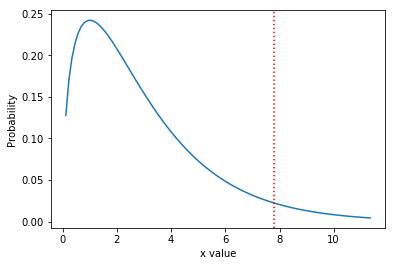

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Probability density function
x_values = np.linspace(
    start=stats.chi2.ppf(0.01, df=3),
    stop=stats.chi2.ppf(0.99, df=3),
    num=100
)
probability_values = stats.chi2.pdf(x_values, df=3)
plt.plot(x_values, probability_values)
plt.xlabel('x value')
plt.ylabel('Probability')

# Critical value corresponding to significance level alpha = 0.05
critical = stats.chi2.ppf(0.95, df=3)
plt.axvline(critical, linestyle=':', color='r')

plt.show()

Every x value on the right of the red vertical line at x=7.8 will lead to rejecting the Null hypothesis! In our case x=42.81. As an additional experiment, you can try changing 0.95 to 1 - (2.7e-9) in critical and you should see the red line move to a critical value around 42.81!

OTHER QUESTION : 
I have difficulties to understand the meaning of the critical value stats.chi2.ppf(q = 0.95, df = 3) we calculated for categorical data.


ANSWER


For any probability distribution and given significance level 
α
, the critical value 
c
 is the value for which 
P
(
X
≤
c
)
=
1
−
α
, i.e. 
P
(
X
>
c
)
=
α
. For well studied probability distributions like the 
χ
2
-distributions we can use the percent point function (PPF), which is just the inverse function of the cumulative distribution function (CDF) to determine 
c
. Here we use scipy's ppf.

# Exercise: hypothesis testing

In the previous unit, we ran two hypothesis tests. In both examples, we created a sample which was on purpose different from our underlying populations. Repeat the two hypothesis tests but this time for samples which are randomly selected. You can keep the same sample sizes. Draw the appropriate conclusions for each test.

In [115]:
poisson1 = stats.poisson.rvs(mu=55, size=200000)
poisson2 = stats.poisson.rvs(mu=10, size=100000)
population = np.concatenate((poisson1, poisson2))

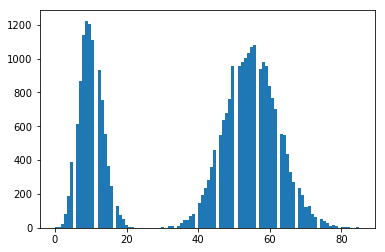

In [119]:
sample =  np.random.choice(population, size=30000)  
plt.hist(sample,100);

In [120]:
t_statistic, p_value = stats.ttest_1samp(sample, popmean=population.mean())
t_statistic

0.5207766571400354

In [121]:
p_value

0.6025262097249151

In [146]:
data =pd.DataFrame(['red']*50000 + ['blue']*30000 + ['green']*10000 + ['white']*10000) 
sample_df = pd.DataFrame(np.random.choice(data[0], size=3000))
sample_df.head()

,0
0,blue
1,blue
2,blue
3,red
4,red


In [147]:
data_count = pd.crosstab(index=data[0], columns="count")
data_count

col_0,count
0,
blue,30000
green,10000
red,50000
white,10000


In [148]:
sample_count = pd.crosstab(index=sample_df[0], columns="count")
sample_count

col_0,count
0,
blue,895
green,298
red,1488
white,319


In [149]:
expected_count = data_count * len(sample_df) / len(data)
expected_count

col_0,count
0,
blue,900.0
green,300.0
red,1500.0
white,300.0


In [150]:
chi_square = ((( sample_count - expected_count)**2) / expected_count).sum()
chi_square

col_0
count    1.340444
dtype: float64

In [151]:
stats.chi2.ppf(q = 0.95, df = 4-1)

7.814727903251179

In [152]:
p_value = 1 - stats.chi2.cdf(x=chi_square,  df=3)
p_value

array([0.71955228])

# A / B Testing 

The chi-square test we looked at in the previous unit **can also be used to test for independence between two categorical variables. We already defined the concept of independent random variables in our subject on probability. Here we will look at an example concerning A/B testing which is a very important tool in statistical analysis.** Now, the topic of A/B testing is extremely complex and there are entire courses dedicated to it. Here we aim to just give you a taste of what A/B testing can be used for.

A very common application of this method is the following scenario: suppose you work for a company that receives online traffic through ads. The design team has come up with 2 versions of the ad (which we will call A and B) and it is your job as the data scientist to determine which ad is better. You decide to set up an online experiment where internet users are directed randomly to one of the two ads. After a week you collect the data on each ad: how many users saw it and how many of these users actually clicked on it.

Your results are as follows

- ad A: 5015 users saw the ad, 481 users clicked on the ad
- ad B: 5018 users saw the ad, 536 users clicked on the ad

Now we can easily compute the conversion rates of each ad

In [154]:
convA = 481/5015 * 100
convA

9.591226321036888

In [155]:
convB = 536/5018 * 100
convB

10.681546432841769

And based on this it seems that ad B did better. **But with such a small difference how can we be sure that the version of the ad the user saw really had an effect on the user clicking the ad?**
Well to test the statistical significance of such a result we can use once again hypothesis testing.

Let's start by formalizing our experiment. We can interpret each ad as a **Bernoulli trial where a success just means that the user clicked on the ad. We introduce the following two random variables**

- let V denote the version of the ad that the users saw (so V = A or V= B)
- let C denote the outcome (so C = s (for success if the there was a click) and C = f (for failure) if there was no click)

**Then what we are essentially asking is whether the random variables C and V are independent.**  That is, does the version of the ad affect the probability of the success? So our null hypothesis is that V and C are independent.

Let's use the built-in functions from Python to test this hypothesis. We start by entering the results of our experiment, i.e. the number of failures and successes for each version, as NumPy array

In [160]:
#results = np.array([[A_failures, A_successes],[B_failures, B_successes]])
results = np.array([[4534, 481],[4482, 536]])

We now call the **stats.chi2_contingency** function and store all of the returned values as follows

In [161]:
chi_square, p_value, df, matrix = stats.chi2_contingency(observed=results)

Now we will not go into the full theoretical details behind this method but it basically applies a formula similar to the ones we used in the previous unit. Let's focus on interpreting the results

In [162]:
chi_square, p_value

(3.154847013454899, 0.07570178695592192)

Unlike our previous tests, **the p-value here is quite large and certainly larger than our significance value of 0.05.** Therefore, in this case, we fail to reject the null hypothesis. An important thing to note here is that if the p-values are larger than the significance value (like in our case) **the only information that we obtain from a hypothesis test is that the data does not contradict the null hypothesis.** In other words, **we cannot determine whether the null hypothesis is true or false. We can never conclude from a hypothesis test that the null hypothesis is true.** So in our case, we cannot conclude whether the version of the ad had any effect on the click rate or not.

As an exercise, try running the same analysis but for the following results:

- ad A: 5000 users saw the ad, 3200 users clicked on the ad
- ad B: 5000 users saw the ad, 3000 users clicked on the ad

In [181]:
#results = np.array([[A_failures, A_successes],[B_failures, B_successes]])
results2 = np.array([[5000, 3200],[5000, 3000]])

In [182]:
chi_square, p_value, df, matrix = stats.chi2_contingency(observed=results2)

In [183]:
chi_square, p_value

(3.9188195520259654, 0.04774839665341007)

**our null hypothesis is 'The variables V (version) and C (clicks) are independent'. As the p-value of 0.047… is below the chosen significance level (0.05) you reject the null hypothesis and accept the alternative hypothesis that V and C are not independent and hence there is a difference between the effectiveness of the ads.**

Null hypothesis = 'The variables V (version) and C (clicks) are independent' meaning the version of the add has no influence on the click rate.

So, by having a p-value below the signficance level, we reject the null hypothesis which means 'The variables V (version) and C (clicks) are DEPENDENT' ==> the version of the add has an influence on the click rate.


#### Significance level = 0.05 ? why ?
The significance level measures the probability of making making a type I error, i.e. the probability that we reject the null hypothesis despite it being true. So if we set the significance level at 0.05, then we accept a 5% risk of falsely rejecting the null hypothesis. Significance levels should be determined by the use case and the circumstance, but 0.05 and 0.01 are the most common significance levels (some historical background) which we typically use when we don't have reasons for another significance level.

Note for normal distributions 0.05 corresponds roughly to the probability of a random sample falling outside of 2 standard deviations from the mean.

